In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [3]:
import random
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
print("Hello, World!!") #Tester code. Newbie here!

Hello, World!!


In [5]:
print("The task here is to apply machine learning to develop a classifier to identify which traveler could survive and which could not.")

The task here is to apply machine learning to develop a classifier to identify which traveler could survive and which could not.


In [6]:
data = pd.read_csv('gender_submission.csv')
test_data = pd.read_csv('test.csv')
train_data = pd.read_csv('train.csv')

In [7]:
#print(train_data['Parch'].unique().tolist())
train_data.head(10)
#train_data[train_data['Name'].str.contains('Johnson')] #==2]
# Step1 is to explore the data and then clean the data (generally drop Nan valued rows)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
# Which variables can make an impact on survival: PClass (economic status), Sex (Females likely to get lifeboat; 
# Sexism thou other name is Chivalry!), Age (children and aged people might be preferred or older people might be)
# left behind {No boat for old men}), SibSp (siblings and spouses survival/death may be correlated), 
# Fare (economic class proxy again. Though doubtful if it can give any more info than Pclass), Parch (Nannies may)
# abandon the kids but parents will not. Children travelling with nanny are prone to death.

## Which variables should be irrelevant for survival: PassengerId, Name (semi-useful as sir names can identify 
# family), Ticket (Redundant or useless information), 


C:\Users\dusad\Anaconda1\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


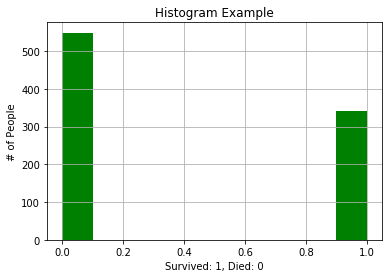

In [9]:
# Explore the histogram of survival.
plt.hist(train_data['Survived'].values, 10, normed=False, facecolor='green')

plt.xlabel('Survived: 1, Died: 0')
plt.ylabel('# of People')
plt.title('Histogram Example')

plt.grid(True)
plt.show()

In [10]:
# Identify the length of training data
train_data.shape

(891, 12)

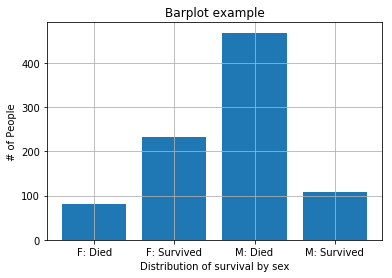

891

In [11]:
# Plot Bar plot for both sexes corresponding to their deaths and survival.
# Extract data values.
female =  train_data['Sex'].str.contains('female')
male =  (train_data['Sex'] == 'male')
survived = train_data['Survived'].values == 1
died = train_data['Survived'].values == 0

female_death = train_data[female & died]
male_death = train_data[male & died]
female_survived = train_data[female & survived]
male_survived = train_data[male & survived]

plt.bar(['F: Died', 'F: Survived','M: Died', 'M: Survived'], [len(female_death),len(female_survived),len(male_death),len(male_survived)] ,align='center')
plt.xlabel('Distribution of survival by sex')
plt.ylabel('# of People')
plt.title('Barplot example')

plt.grid(True)
plt.show()
len(female_death)+len(female_survived)+len(male_death)+len(male_survived)
#[len(female_death),len(female_survived),len(male_death),len(male_survived)]


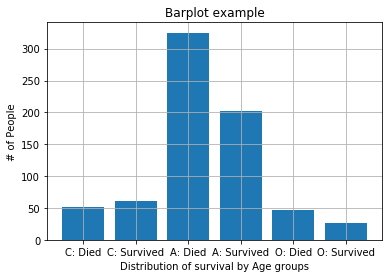

PassengerId    453.144213
Survived         0.383302
Pclass           2.258065
Age             30.219165
SibSp            0.343454
Parch            0.318786
Fare            33.800695
dtype: float64

In [12]:
# PLot survival with respect to age groups: (0-18,18-50,>50)
survived = train_data['Survived'].values == 1
died = train_data['Survived'].values == 0

children = train_data['Age']<18
adult = (train_data['Age']<50) & (train_data['Age']>=18)
#adult2 = train_data['Age']>=18
#adult = train_data[adult1]
#adult
old = train_data['Age']>=50

children_died = train_data[children & died]
children_survived = train_data[children & survived]
adult_died = train_data[adult & died]
adult_survived = train_data[adult & survived]
old_died = train_data[old & died]
old_survived = train_data[old & survived]

plt.bar(['C: Died', 'C: Survived','A: Died', 'A: Survived', 'O: Died', 'O: Survived'], [len(children_died),len(children_survived),len(adult_died),len(adult_survived),len(old_died),len(old_survived)] ,align='center')
plt.xlabel('Distribution of survival by Age groups')
plt.ylabel('# of People')
plt.title('Barplot example')

plt.grid(True)
plt.show()
# The sum of all these values do not add upto 891 because there are values with NaN in ages.
[len(children_died),len(children_survived),len(adult_died),len(adult_survived),len(old_died),len(old_survived)]
train_data[adult].mean()

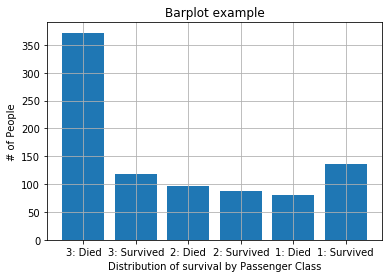

In [13]:
# train_data['Pclass'].isnull().values
# Survival rate by Passenger class
class_3 = train_data['Pclass'] == 3
class_2 = train_data['Pclass'] == 2
class_1 = train_data['Pclass'] == 1

class_3_died = train_data[class_3 & died]
class_3_survived = train_data[class_3 & survived]
class_2_died = train_data[class_2 & died]
class_2_survived = train_data[class_2 & survived]
class_1_died = train_data[class_1 & died]
class_1_survived = train_data[class_1 & survived]

plt.bar(['3: Died', '3: Survived','2: Died', '2: Survived', '1: Died', '1: Survived'], [len(class_3_died),len(class_3_survived),len(class_2_died),len(class_2_survived),len(class_1_died),len(class_1_survived)] ,align='center')
plt.xlabel('Distribution of survival by Passenger Class')
plt.ylabel('# of People')
plt.title('Barplot example')

plt.grid(True)
plt.show()

In [14]:
## Now let's build the classifier
## Delete the columns providing redundant or unuseful information for survival classification
useful_train_data =  train_data.copy()
del useful_train_data['Ticket']
del useful_train_data['Fare']
del useful_train_data['Cabin']
del useful_train_data['Embarked']
useful_train_data.columns
useful_train_data['Sex'] = (useful_train_data['Sex'] == 'male')*1

In [15]:
## Drop any row which contains NaN values
useful_train_data = useful_train_data.dropna()
#useful_train_data['Age'].isnull().any()
useful_train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch'],
      dtype='object')

In [16]:
## 
y_train = useful_train_data['Survived'].copy()
decisive_features = ['Pclass', 'Sex', 'Age', 'SibSp','Parch']
X_train = useful_train_data[decisive_features].copy()


In [18]:
X_train

,Pclass,Sex,Age,SibSp,Parch
0,3,1,22.0,1,0
1,1,0,38.0,1,0
2,3,0,26.0,0,0
3,1,0,35.0,1,0
4,3,1,35.0,0,0
6,1,1,54.0,0,0
7,3,1,2.0,3,1
8,3,0,27.0,0,2
9,2,0,14.0,1,0
10,3,0,4.0,1,1


In [19]:
survival_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
survival_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [20]:
type(survival_classifier)

sklearn.tree.tree.DecisionTreeClassifier

In [21]:
## Predict the results on test data
## First clean the test data also similar to train data
test_data[test_data['Name'].str.contains('Master')]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
21,913,3,"Olsen, Master. Artur Karl",male,9.00,0,1,C 17368,3.1708,NaN,S
55,947,3,"Rice, Master. Albert",male,10.00,4,1,382652,29.1250,NaN,Q
64,956,1,"Ryerson, Master. John Borie",male,13.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
80,972,3,"Boulos, Master. Akar",male,6.00,1,1,2678,15.2458,NaN,C
89,981,2,"Wells, Master. Ralph Lester",male,2.00,1,1,29103,23.0000,NaN,S
154,1046,3,"Asplund, Master. Filip Oscar",male,13.00,4,2,347077,31.3875,NaN,S
161,1053,3,"Touma, Master. Georges Youssef",male,7.00,1,1,2650,15.2458,NaN,C
192,1084,3,"van Billiard, Master. Walter John",male,11.50,1,1,A/5. 851,14.5000,NaN,S
194,1086,2,"Drew, Master. Marshall Brines",male,8.00,0,2,28220,32.5000,NaN,S
196,1088,1,"Spedden, Master. Robert Douglas",male,6.00,0,2,16966,134.5000,E34,C


In [22]:
useful_test_data = test_data.copy()
del useful_test_data['Ticket']
del useful_test_data['Fare']
del useful_test_data['Cabin']
del useful_test_data['Embarked']
useful_test_data.columns
useful_test_data['Sex'] = (useful_test_data['Sex'] == 'male')*1

## Do not Drop any row which contains NaN values
#useful_test_data = useful_test_data.dropna()
useful_test_data['Age'].isnull().any()
#useful_test_data.columns
## Fix null values
null_child_boy = (useful_test_data['Name'].str.contains('Master') & useful_test_data['Age'].isnull())
null_adult = ((useful_test_data['Name'].str.contains('Ms.') | useful_test_data['Name'].str.contains('Miss') | useful_test_data['Name'].str.contains('Mr'))& useful_test_data['Age'].isnull())
useful_test_data.loc[null_child_boy, 'Age'] = 5#._update_inplace(30)
#child_fix['Age']
#adult_fix = useful_test_data.loc[null_adult]
useful_test_data.loc[null_adult, 'Age'] = 30#._update_inplace(30)
useful_test_data[useful_test_data['Name'].str.contains('Master')]

useful_test_data.isnull().any()



PassengerId    False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
dtype: bool

In [23]:
#y_test = useful_test_data['Survived'].copy()
decisive_features = ['Pclass', 'Sex', 'Age', 'SibSp','Parch']
X_test = useful_test_data[decisive_features].copy()


In [24]:
predictions = survival_classifier.predict(X_test)

In [25]:
data_to_submit = pd.DataFrame({'PassengerId': useful_test_data['PassengerId'], 'Survived': predictions})

In [26]:
data_to_submit.shape

(418, 2)

In [27]:
data_to_submit.to_csv('csv_to_submit.csv', index = False)